# 1. Load packages and data

### 1.1. Packages

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re
import glob
from multiprocessing import Pool, cpu_count
from loguru import logger

### 1.2. Paths

In [16]:
# Define the path to synchronized data directory
script_dir = os.path.dirname(os.path.abspath('__file__'))
synchronized_dir = os.path.join(script_dir, '..', '..', 'synchronized')
appended_dir = os.path.join(script_dir, '..', '..', 'appended')
metadata_dir = os.path.join(script_dir, '..', '..', 'metadata')

### 1.3. Data

In [4]:
# Parallel file reading function
def read_synced_file(file_path):
    df = pd.read_csv(file_path, parse_dates=['utc_timestamp'], date_format='ISO8601')
    print(f'Read {os.path.basename(file_path)}: {df.shape}')
    return df

# Get all CSV files in synchronized directory (already rted chronologically)
print(f'Looking for synchronized files in: {synchronized_dir}')
all_files = sorted(glob.glob(os.path.join(synchronized_dir, 'synced_*.csv')))
print(f'Found {len(all_files)} synchronized files')

# Read files in parallel using all CPU cores minus 1
with Pool(cpu_count() - 1) as pool:
    dfs = pool.map(read_synced_file, all_files)

# Concatenate all dataframes at once (preserving chronological order)
full_synced_df = pd.concat(dfs, ignore_index=True)
print(f'Total shape after appending: {full_synced_df.shape}')
print(f'Date range: {full_synced_df["utc_timestamp"].min()} to {full_synced_df["utc_timestamp"].max()}')

# Display first few rows
full_synced_df.head()

Looking for synchronized files in: /work/Thesis/Master-s-thesis/code/data/cleaning-scripts/notebooks/../../synchronized
Found 519 synchronized files
Read synced_2024-01-24_11-33-00_to_2024-01-24_14-38-50.csv: (744, 37)
Read synced_2024-02-29_17-02-30_to_2024-02-29_19-57-15.csv: (700, 37)Read synced_2024-03-31_11-59-15_to_2024-03-31_13-59-15.csv: (481, 37)
Read synced_2024-02-24_11-44-15_to_2024-02-24_15-26-00.csv: (888, 37)Read synced_2024-03-02_16-25-00_to_2024-03-02_18-33-30.csv: (515, 37)Read synced_2024-03-07_02-49-30_to_2024-03-07_04-59-15.csv: (520, 37)



Read synced_2024-03-30_04-03-00_to_2024-03-30_08-00-30.csv: (951, 37)
Read synced_2024-01-11_18-52-30_to_2024-01-11_22-59-15.csv: (988, 37)Read synced_2024-01-28_17-12-45_to_2024-01-28_21-12-30.csv: (960, 37)Read synced_2024-01-31_01-59-15_to_2024-01-31_04-20-30.csv: (566, 37)Read synced_2024-02-17_15-06-00_to_2024-02-17_18-26-30.csv: (802, 37)Read synced_2024-03-29_00-53-45_to_2024-03-29_05-00-00.csv: (985, 37)Read synced_2024

,utc_timestamp,seg_id,2::0::6::1_1::1::0::2::0_1::0::1::0_8,2::0::7::0_1::1::0::2::0_1::0::5::11_8,2::0::1::0_1::1::0::7::0_1::0::4::22_8,2::0::1::0_1::1::0::7::0_2::0::15::22_8,2::0::5::0_1::1::0::2::0_2::0::8::21_8,2::0::5::0_1::1::0::2::0_6::0::1::0_8,1::0::15::0_1::2::0::3::0_1::0::6::0_8,1::0::14::0_1::2::0::8::0_3::0::3::0_8,...,4::0::4::0_1::1::0::7::0_2::0::15::21_8,4::0::4::0_1::1::0::7::0_45::0::2::0_8,4::0::8::0_1::1::0::7::0_4::0::12::0_8,4::0::8::0_1::1::0::7::0_2::0::18::21_8,4::0::4::0_1::1::0::7::0_56::0::3::0_8,4::0::8::0_1::1::0::7::0_40::0::2::0_8,4::0::4::0_1::1::0::7::0_1::0::4::21_8,4::0::8::0_1::1::0::7::0_56::0::4::0_8,4::0::8::0_1::1::0::7::0_45::0::1::0_8,4::0::8::0_1::1::0::7::0_56::0::6::0_8
0,2024-01-01 01:59:15.011000+00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01 01:59:30.011000+00:00,2,0.0,0.10,0.540000,72.000000,120.22,0.520,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-01 01:59:45.011000+00:00,2,0.0,0.08,1.280000,343.400000,120.30,0.560,14.419556,0.023865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-01 02:00:00.011000+00:00,2,0.0,0.02,0.620000,317.600000,120.30,0.325,14.305115,0.023865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-01 02:00:15.011000+00:00,2,0.0,0.00,0.322222,137.111111,120.10,-0.420,14.400483,0.023865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
full_unsynced_df = pd.read_csv(os.path.join(appended_dir, 'excl_noon_reports.csv'), parse_dates=['utc_timestamp'], date_format='ISO8601')
full_unsynced_df.head()

,utc_timestamp,qid_mapping,value,quantity_name,source_name,unit,time_delta_sec
0,2024-01-01 00:00:00+00:00,4::0::8::0_1::1::0::7::0_56::0::3::0_8,-0.4000,Vessel External Conditions Eastward Sea Water ...,Provider S,m/s,NaN
1,2024-01-01 00:00:00+00:00,4::0::4::0_1::1::0::7::0_56::0::4::0_8,0.0000,Vessel External Conditions Northward Sea Water...,Provider MB,m/s,NaN
2,2024-01-01 00:00:00+00:00,4::0::4::0_1::1::0::7::0_45::0::1::0_8,2.7000,Vessel External Conditions Wave Significant He...,Provider MB,m,NaN
3,2024-01-01 00:00:00+00:00,4::0::8::0_1::1::0::7::0_56::0::5::0_8,0.5391,Vessel External Conditions Eastward Wind Velocity,Provider S,m/s,NaN
4,2024-01-01 00:00:00+00:00,4::0::4::0_1::1::0::7::0_2::0::15::21_8,79.0000,Vessel External Conditions Wind True Angle,Provider MB,degrees,NaN


In [6]:
full_unsynced_df['qid_mapping'].unique()

<StringArray>
[ '4::0::8::0_1::1::0::7::0_56::0::3::0_8',
  '4::0::4::0_1::1::0::7::0_56::0::4::0_8',
  '4::0::4::0_1::1::0::7::0_45::0::1::0_8',
  '4::0::8::0_1::1::0::7::0_56::0::5::0_8',
 '4::0::4::0_1::1::0::7::0_2::0::15::21_8',
  '4::0::4::0_1::1::0::7::0_45::0::2::0_8',
  '4::0::8::0_1::1::0::7::0_4::0::12::0_8',
 '4::0::8::0_1::1::0::7::0_2::0::18::21_8',
  '4::0::4::0_1::1::0::7::0_56::0::3::0_8',
  '4::0::8::0_1::1::0::7::0_40::0::2::0_8',
  '4::0::4::0_1::1::0::7::0_1::0::4::21_8',
  '4::0::8::0_1::1::0::7::0_56::0::4::0_8',
  '4::0::8::0_1::1::0::7::0_45::0::1::0_8',
  '4::0::8::0_1::1::0::7::0_56::0::6::0_8',
   '2::0::6::1_1::1::0::2::0_1::0::1::0_8',
  '2::0::7::0_1::1::0::2::0_1::0::5::11_8',
  '2::0::1::0_1::1::0::7::0_1::0::4::22_8',
 '2::0::1::0_1::1::0::7::0_2::0::15::22_8',
  '2::0::4::0_1::1::0::2::0_37::0::2::0_8',
  '2::0::5::0_1::1::0::2::0_2::0::8::21_8',
   '2::0::5::0_1::1::0::2::0_6::0::1::0_8',
  '1::0::15::0_1::2::0::3::0_1::0::6::0_8',
  '1::0::14::0_1::

In [7]:
full_synced_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2013093 entries, 0 to 2013092
Data columns (total 37 columns):
 #   Column                                   Dtype              
---  ------                                   -----              
 0   utc_timestamp                            datetime64[us, UTC]
 1   seg_id                                   int64              
 2   2::0::6::1_1::1::0::2::0_1::0::1::0_8    float64            
 3   2::0::7::0_1::1::0::2::0_1::0::5::11_8   float64            
 4   2::0::1::0_1::1::0::7::0_1::0::4::22_8   float64            
 5   2::0::1::0_1::1::0::7::0_2::0::15::22_8  float64            
 6   2::0::5::0_1::1::0::2::0_2::0::8::21_8   float64            
 7   2::0::5::0_1::1::0::2::0_6::0::1::0_8    float64            
 8   1::0::15::0_1::2::0::3::0_1::0::6::0_8   float64            
 9   1::0::14::0_1::2::0::8::0_3::0::3::0_8   float64            
 10  1::0::25::0_1::2::0::8::0_20::0::1::0_8  float64            
 11  3::0::1::0_1::1::0::2::0_11::0::4::

# 2. Compare timeline from synced file to original data to see if it lines up

In [83]:
# Definitions
sensor_qids = [
    "3::0::1::0_1::1::0::2::0_11::0::2::0_8",
    "3::0::1::0_1::1::0::2::0_11::0::1::0_8",
    "3::0::1::0_1::2::0::8::0_1::0::6::0_8",
    "3::0::1::0_1::1::0::2::0_11::0::3::0_8",
    "3::0::1::0_1::1::0::2::0_11::0::4::0_8",
    "2::0::1::0_1::1::0::7::0_1::0::4::22_8",
    "2::0::1::0_1::1::0::7::0_2::0::15::22_8",
    "2::0::6::1_1::1::0::2::0_1::0::1::0_8",
    "2::0::5::0_1::1::0::2::0_6::0::1::0_8",
    "2::0::5::0_1::1::0::2::0_2::0::8::21_8",
    "1::0::25::0_1::2::0::8::0_20::0::1::0_8",
    "2::0::7::0_1::1::0::2::0_1::0::5::11_8",
    "2::0::11::0_1::2::0::8::0_22::0::1::1_8",
    "2::0::11::0_1::1::0::3::0_14::0::1::0_8",
    "2::0::11::0_1::1::0::3::0_1::0::6::0_8",
    "2::0::11::0_1::1::0::3::0_12::0::2::0_8",
    "2::0::11::0_1::1::0::3::0_17::0::1::0_8",
    "2::0::11::0_1::1::0::3::0_15::0::1::0_8",
    "2::0::11::0_1::1::0::3::0_12::0::1::0_8",
    "1::0::14::0_1::2::0::8::0_3::0::3::0_8",
    "1::0::15::0_1::2::0::3::0_1::0::6::0_8"
]
weather_qids = [
    "4::0::4::0_1::1::0::7::0_45::0::1::0_8",
    "4::0::4::0_1::1::0::7::0_2::0::15::21_8",
    "4::0::4::0_1::1::0::7::0_45::0::2::0_8",
    "4::0::4::0_1::1::0::7::0_1::0::4::21_8",
    "4::0::4::0_1::1::0::7::0_56::0::3::0_8",
    "4::0::4::0_1::1::0::7::0_56::0::4::0_8",
    "4::0::8::0_1::1::0::7::0_45::0::1::0_8",
    "4::0::8::0_1::1::0::7::0_2::0::18::21_8",
    "4::0::8::0_1::1::0::7::0_40::0::2::0_8",
    "4::0::8::0_1::1::0::7::0_4::0::12::0_8",
    "4::0::8::0_1::1::0::7::0_56::0::6::0_8",
    "4::0::8::0_1::1::0::7::0_56::0::5::0_8",
    "4::0::8::0_1::1::0::7::0_56::0::3::0_8",
    "4::0::8::0_1::1::0::7::0_56::0::4::0_8"
]

start_time = pd.to_datetime("2024-01-01", utc=True)
end_time = pd.to_datetime("2024-01-31", utc=True)

print(f'Number of sensor qids: {len(sensor_qids)}')
print(f'Number of weather qids: {len(weather_qids)}')

Number of sensor qids: 21
Number of weather qids: 14


In [ ]:
# Data filtering
def filter_data_by_time_and_qid(synced_df, unsynced_df, qid, start_time, end_time):
    # Filter synced dataframe by time AND keep only rows where the qid column has data (not NaN)
    synced_filtered = synced_df[
        (start_time <= synced_df['utc_timestamp']) & 
        (synced_df['utc_timestamp'] <= end_time) &
        (synced_df[qid].notna())
    ][['utc_timestamp', qid]].copy()

    # Filter unsynced dataframe by time and qid_mapping value
    unsynced_filtered = unsynced_df[
        (start_time <= unsynced_df['utc_timestamp']) &
        (unsynced_df['utc_timestamp'] <= end_time) & 
        (unsynced_df['qid_mapping'] == qid)
    ][['utc_timestamp', 'value']].copy()

    # Rename unsynced 'value' column to match qid name
    unsynced_filtered = unsynced_filtered.rename(columns={'value': qid})

    return synced_filtered, unsynced_filtered

def plot_synced_vs_unsynced(synced_series, unsynced_series, qid):
    plt.figure(figsize=(12, 6))
    plt.plot(synced_series['utc_timestamp'], synced_series[qid], label='Synced')
    plt.plot(unsynced_series['utc_timestamp'], unsynced_series[qid], label='Unsynced')
    plt.title(f'Time Series Comparison for {qid}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

def plot_qid_grid(qid_list, synced_df, unsynced_df, start_time, end_time, title=None):
    """Plot a grid of time series comparisons for multiple QIDs.
    
    Args:
        qid_list: List of QID strings to plot
        synced_df: Synchronized dataframe
        unsynced_df: Unsynchronized dataframe
        start_time: Start time for filtering
        end_time: End time for filtering
        title: Optional title for the entire figure
    """
    # Create grid with rows of 3
    nrows = (len(qid_list) + 2) // 3
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(18, 4 * nrows))
    axes = axes.flatten()  # Flatten to 1D array for easy indexing
    
    for idx, qid in enumerate(qid_list):
        synced_filtered, unsynced_filtered = filter_data_by_time_and_qid(
            synced_df, unsynced_df, qid, start_time, end_time
        )
        axes[idx].plot(synced_filtered['utc_timestamp'], synced_filtered[qid], 
                      color='blue', label='Synced', linewidth=1, alpha=1)
        axes[idx].plot(unsynced_filtered['utc_timestamp'], unsynced_filtered[qid], 
                      color='orange', label='Unsynced', linewidth=1, alpha=1)
        axes[idx].set_title(f'{qid}', fontsize=9)
        axes[idx].set_xlabel('Time', fontsize=8)
        axes[idx].set_ylabel('Value', fontsize=8)
        axes[idx].legend(fontsize=7)
        axes[idx].grid(True, alpha=0.3)
        axes[idx].tick_params(labelsize=7)
    
    # Hide unused subplots
    for idx in range(len(qid_list), len(axes)):
        axes[idx].set_visible(False)
    
    if title:
        fig.suptitle(title, fontsize=14, y=1.00)
    
    plt.tight_layout()
    plt.show()


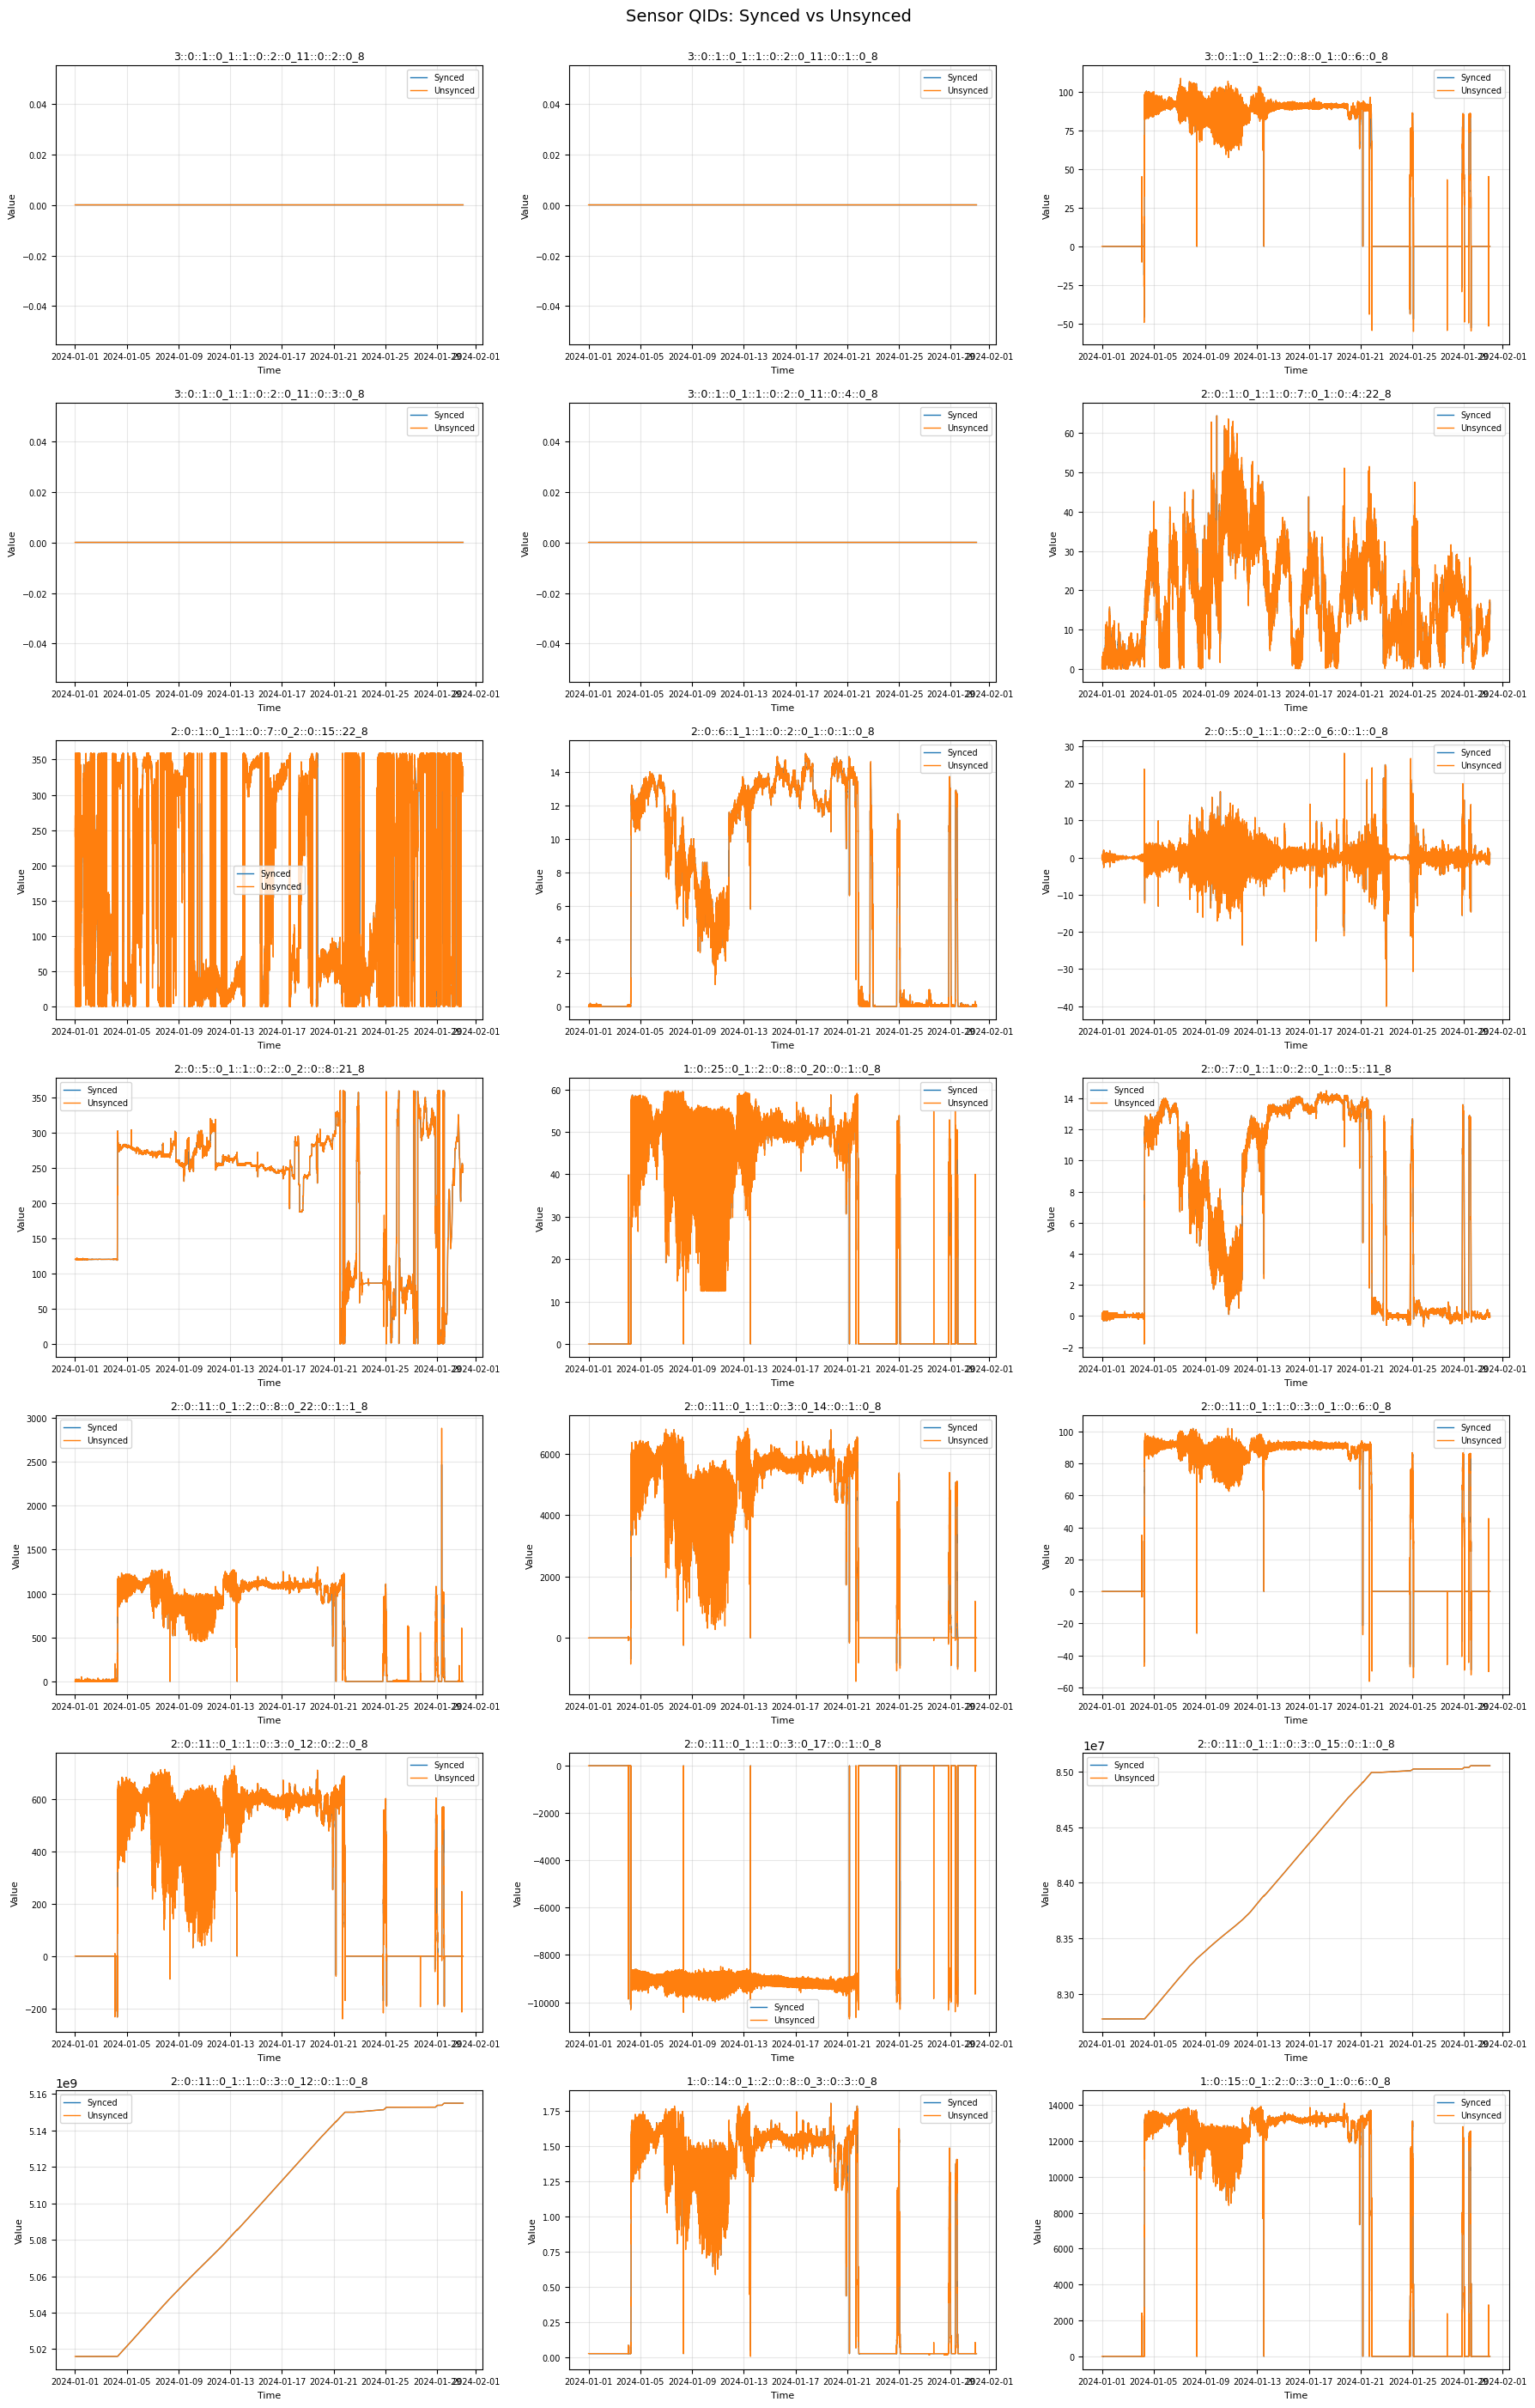

In [85]:
# Plot sensor QIDs comparison
plot_qid_grid(sensor_qids, full_synced_df, full_unsynced_df, start_time, end_time, title='Sensor QIDs: Synced vs Unsynced')


#### repeat for weather...

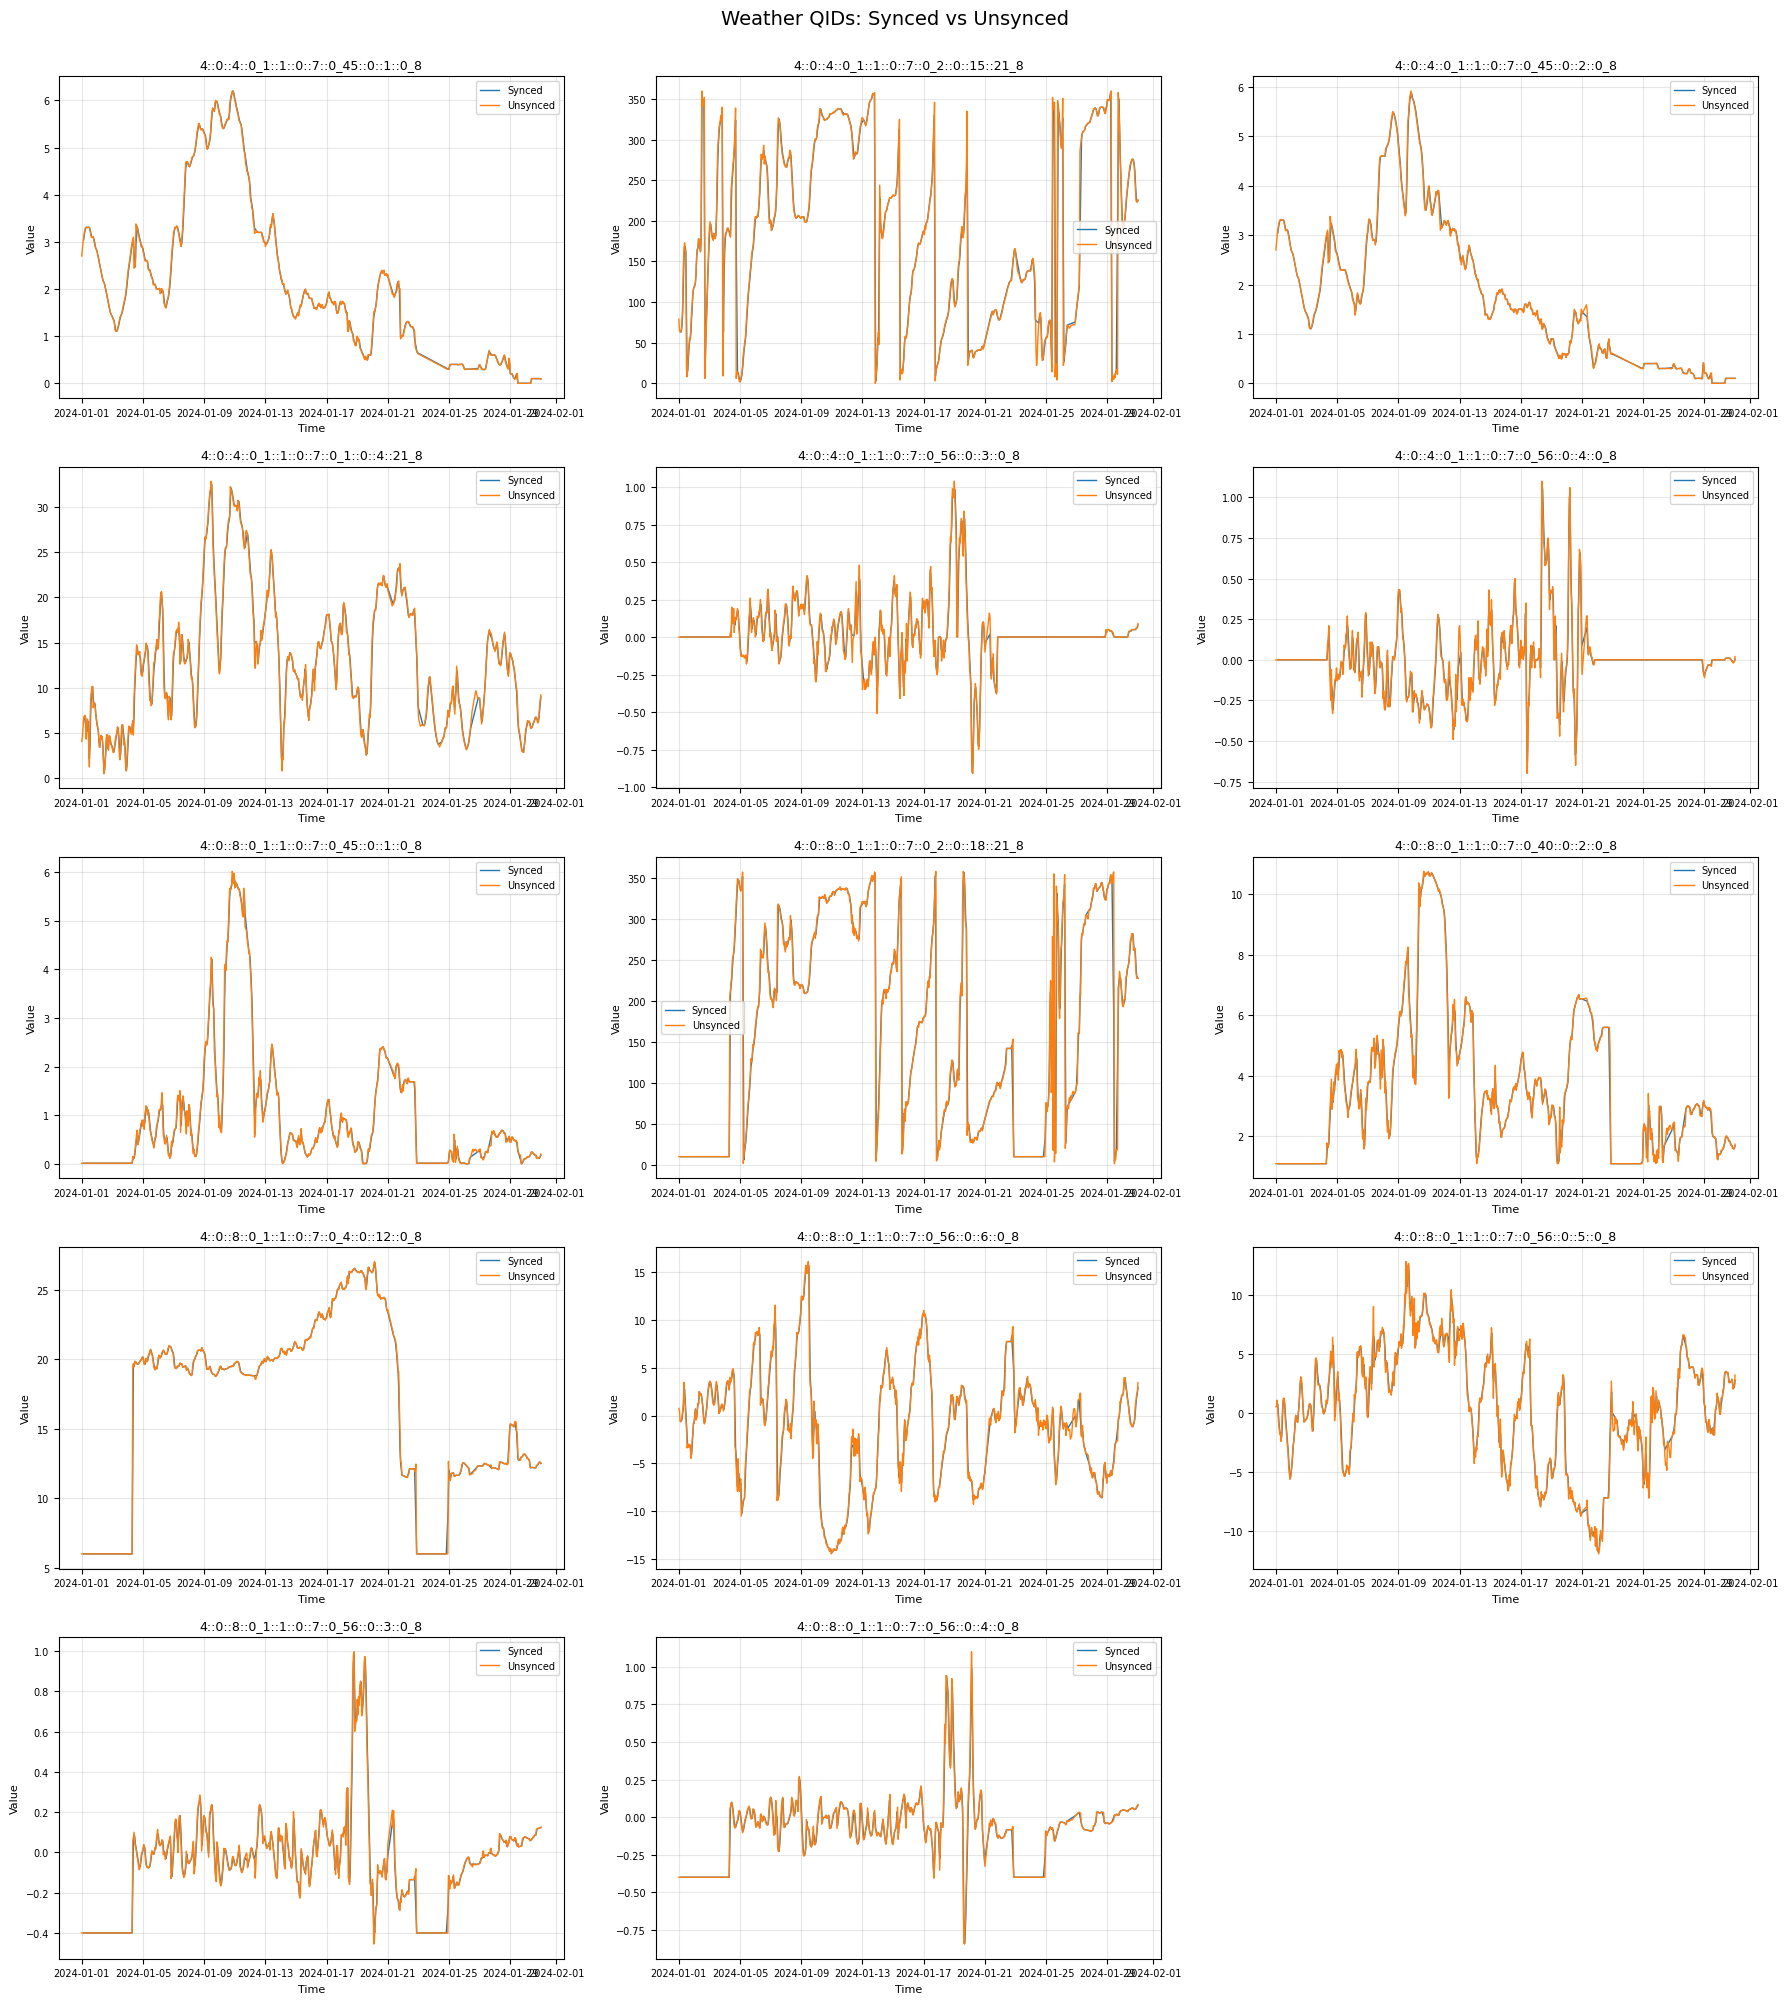

In [86]:
# Plot weather QIDs comparison
plot_qid_grid(weather_qids, full_synced_df, full_unsynced_df, start_time, end_time, title='Weather QIDs: Synced vs Unsynced')

#### Investigate in a bit more detail (for a single hour)

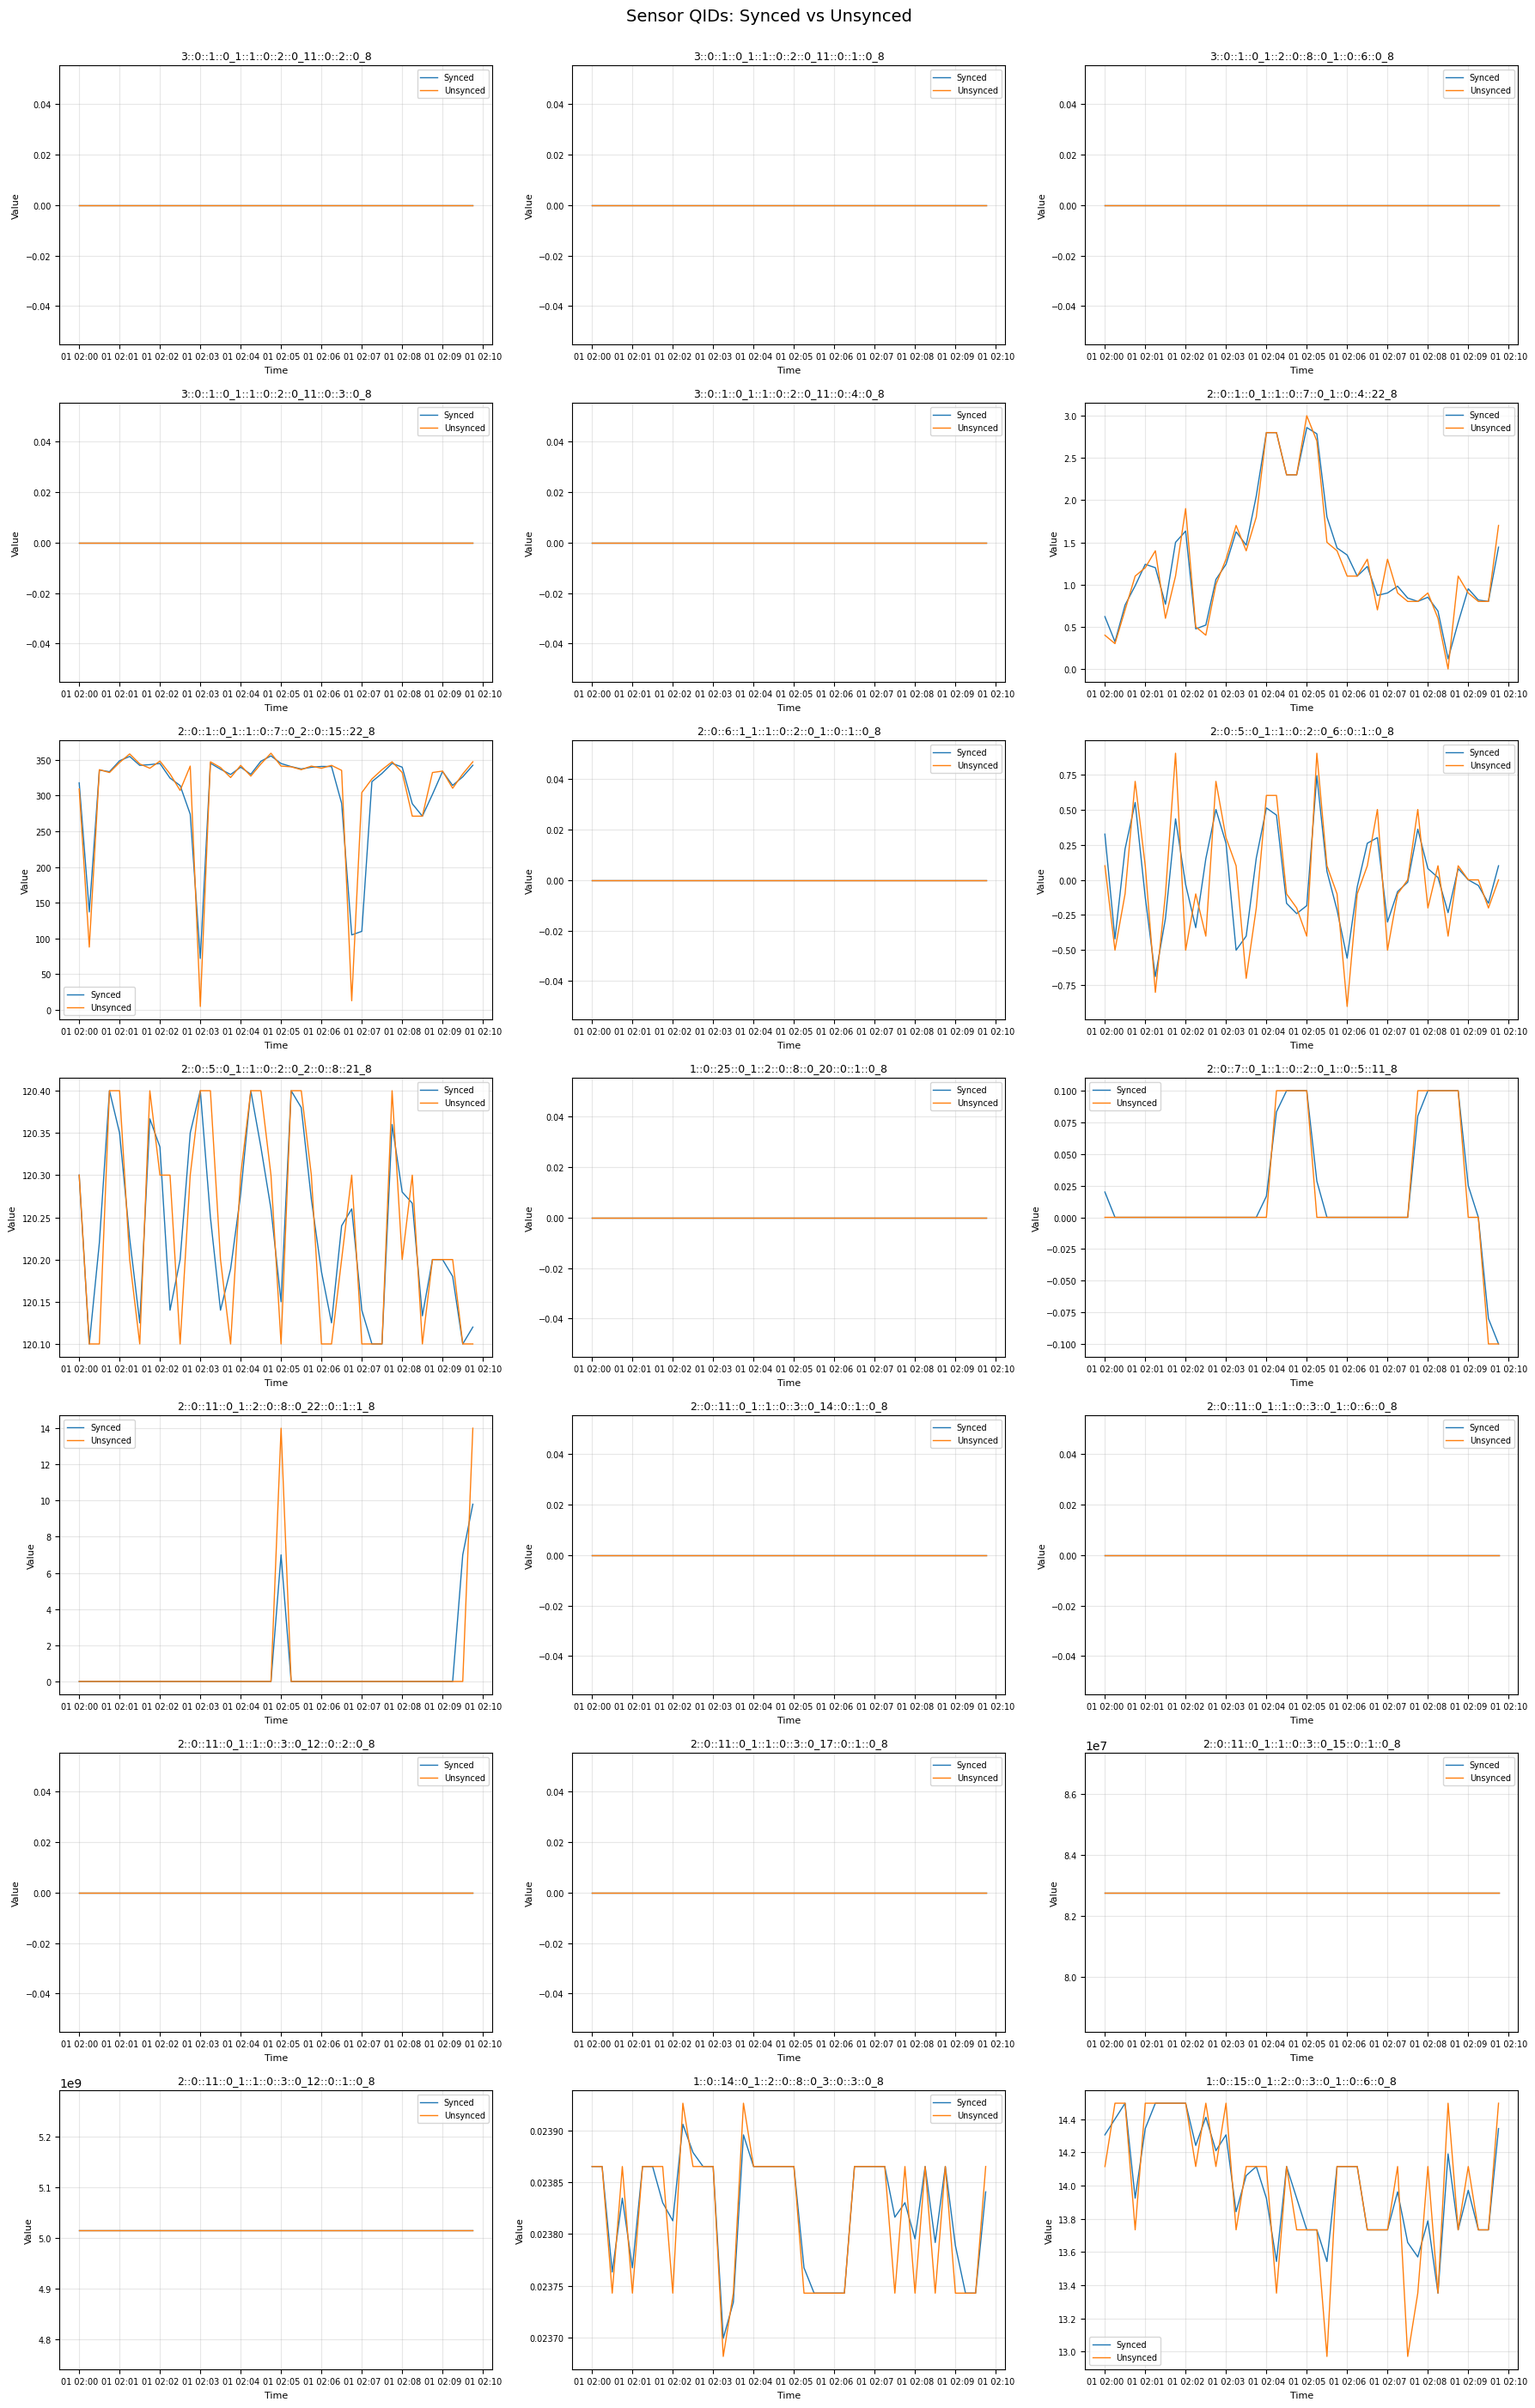

In [90]:
# Definitions
start_time = pd.to_datetime("2024-01-01 02:00:00", utc=True)
end_time = pd.to_datetime("2024-01-01 02:10:00", utc=True)

plot_qid_grid(sensor_qids, full_synced_df, full_unsynced_df, start_time, end_time, title='Sensor QIDs: Synced vs Unsynced')

#### Repeat for weather

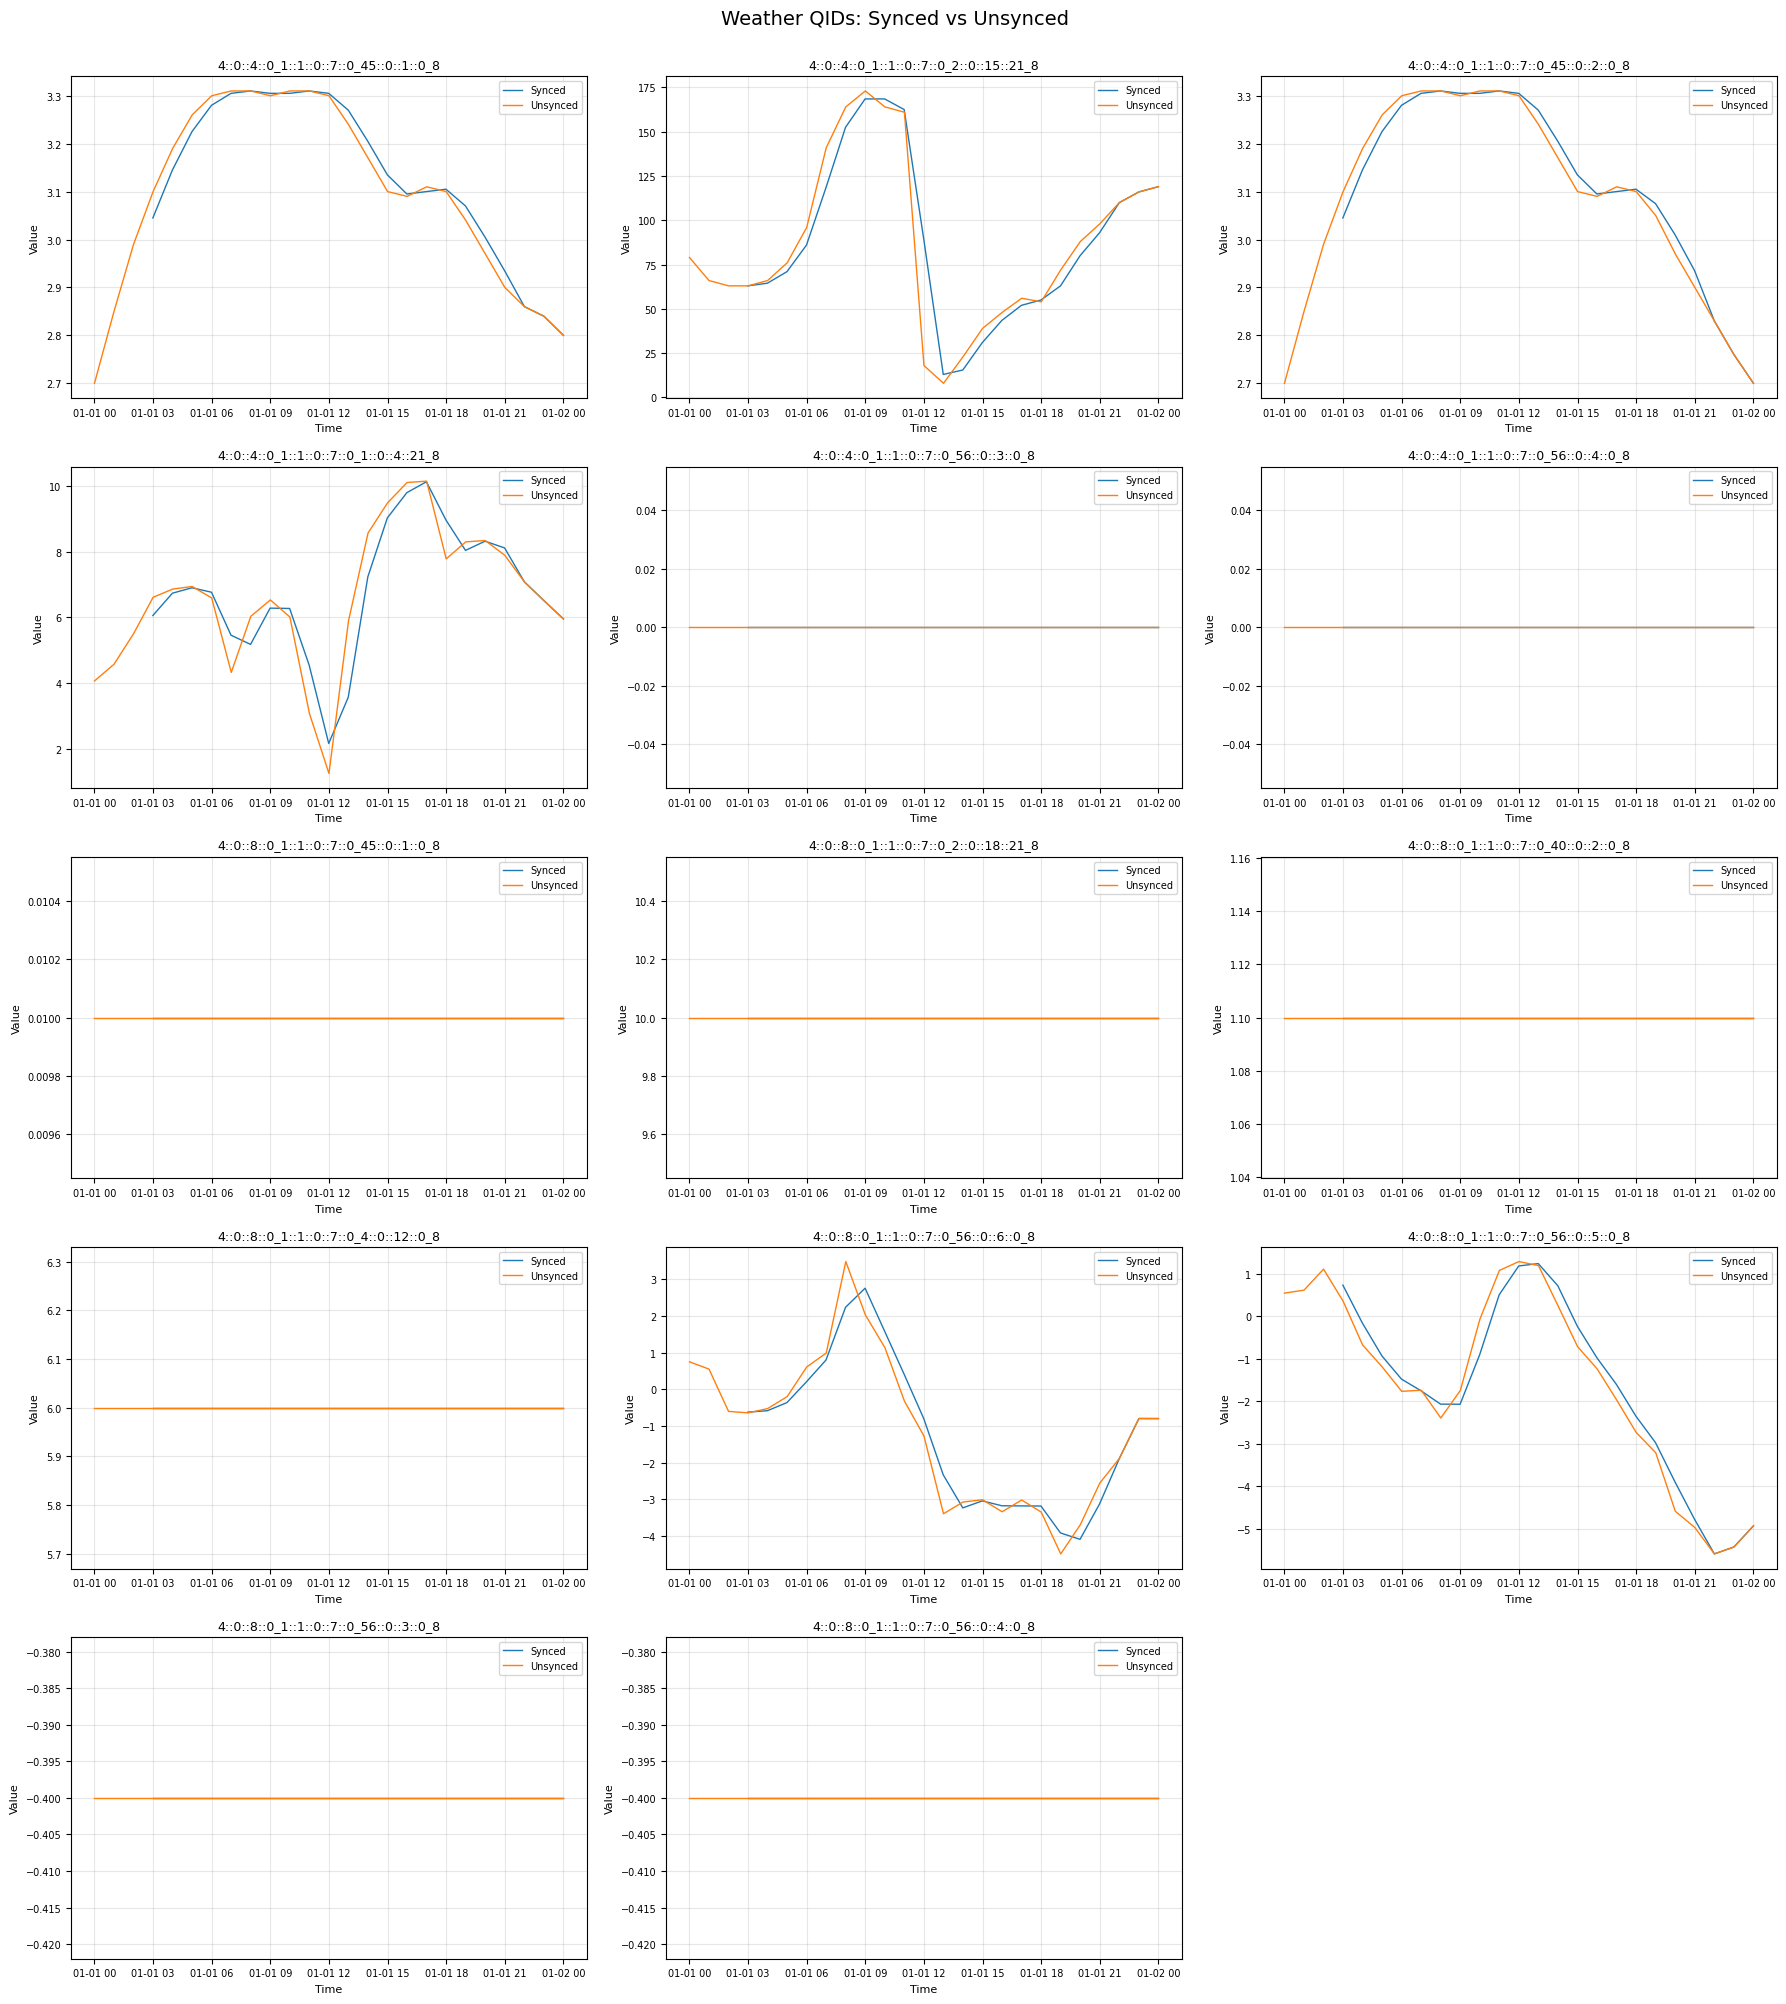

In [91]:
# Definitions
start_time = pd.to_datetime("2024-01-01", utc=True)
end_time = pd.to_datetime("2024-01-02", utc=True)

plot_qid_grid(weather_qids, full_synced_df, full_unsynced_df, start_time, end_time, title='Weather QIDs: Synced vs Unsynced')

# 3. Check that distributions of values roughly resemble those in the original version

In [ ]:
def plot_histogram_comparison(qid_list, synced_df, unsynced_df):
    """Plot histogram comparisons for synced vs unsynced data for multiple QIDs.
    
    Args:
        qid_list: List of QID strings to plot
        synced_df: Synchronized dataframe
        unsynced_df: Unsynchronized dataframe
    """
    # Calculate number of rows needed (2 QIDs per row)
    nrows = (len(qid_list) + 1) // 2
    
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(14, 5 * nrows))
    
    # Handle case where there's only one row or one column
    if nrows == 1 and len(qid_list) == 1:
        axes = np.array([axes])
    elif nrows == 1:
        axes = axes.reshape(1, -1)
    
    for idx, qid in enumerate(qid_list):
        row = idx // 2
        col = idx % 2
        
        # Get synced data (drop NaN values)
        synced_data = synced_df[qid].dropna()
        
        # Get unsynced data
        unsynced_data = unsynced_df[unsynced_df['qid_mapping'] == qid]['value'].dropna()
        
        # Plot overlaid histograms
        axes[row, col].hist(unsynced_data, bins=50, alpha=0.6, color='orange', edgecolor='black', label=f'Unsynced (n={len(unsynced_data)})')
        axes[row, col].hist(synced_data, bins=50, alpha=0.6, color='blue', edgecolor='black', label=f'Synced (n={len(synced_data)})')
        axes[row, col].set_title(f'{qid}', fontsize=9)
        axes[row, col].set_xlabel('Value', fontsize=8)
        axes[row, col].set_ylabel('Frequency', fontsize=8)
        axes[row, col].legend(fontsize=7)
        axes[row, col].tick_params(labelsize=7)
        axes[row, col].grid(True, alpha=0.3)
    
    # Hide unused subplot if odd number of QIDs
    if len(qid_list) % 2 == 1:
        last_row = nrows - 1
        axes[last_row, 1].set_visible(False)
    
    plt.tight_layout()
    plt.show()


### 3.1. Sensor QIDs distribution comparison

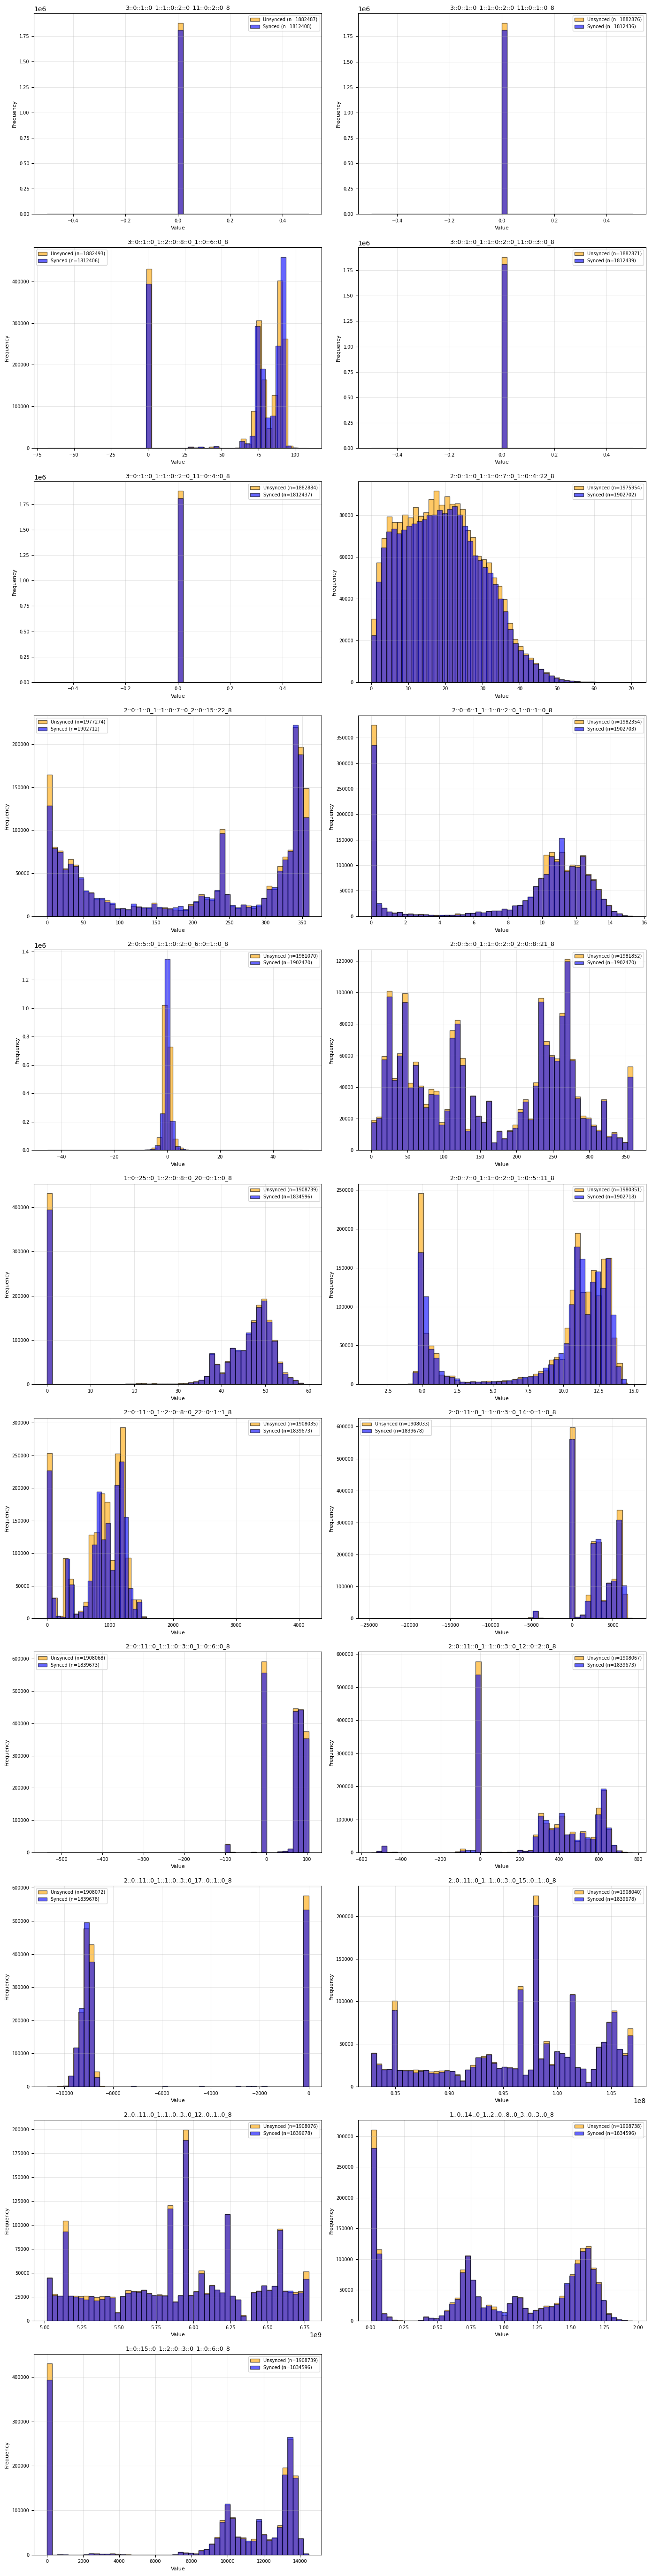

In [96]:
# Plot histogram comparison for sensor QIDs
plot_histogram_comparison(sensor_qids, full_synced_df, full_unsynced_df)


### 3.2. Weather QIDs distribution comparison

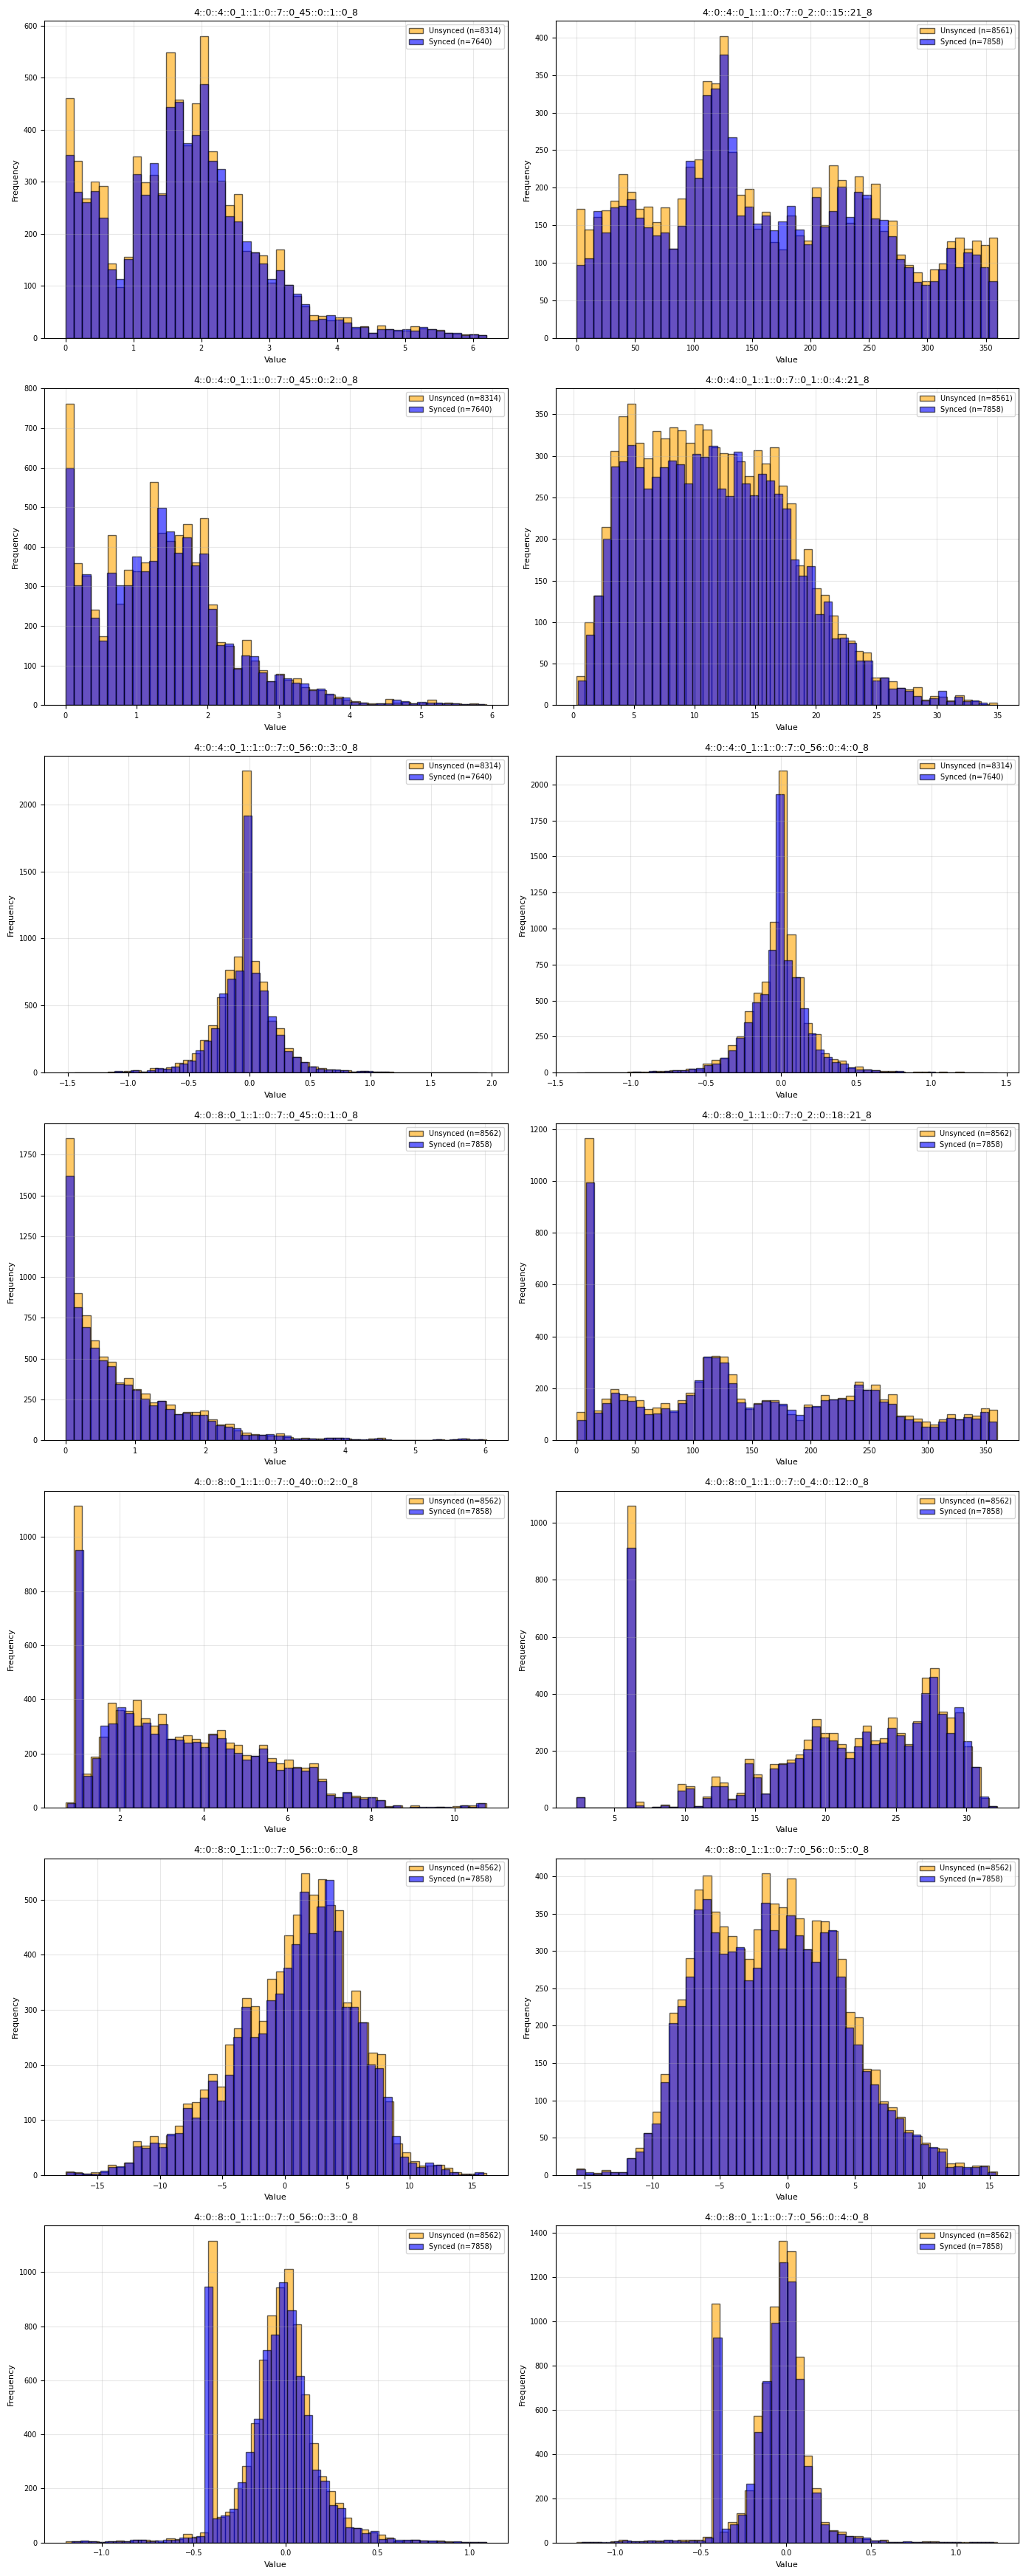

In [97]:
# Plot histogram comparison for weather QIDs
plot_histogram_comparison(weather_qids, full_synced_df, full_unsynced_df)


# 4. Check distribution of stretch durations

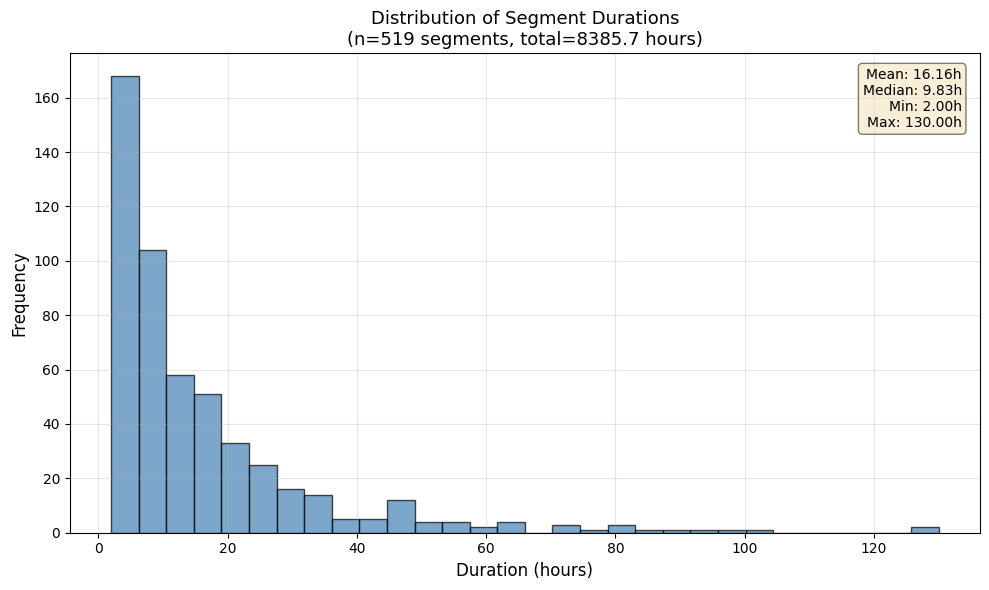

In [98]:
def plot_segment_duration_distribution(segment_dfs):
    """Plot histogram of segment durations.
    
    Args:
        segment_dfs: List of dataframes, each representing a synchronized segment
    """
    # Calculate duration of each segment in hours
    durations = []
    for df in segment_dfs:
        duration = (df['utc_timestamp'].max() - df['utc_timestamp'].min()).total_seconds() / 3600
        durations.append(duration)
    
    # Create histogram
    plt.figure(figsize=(10, 6))
    plt.hist(durations, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    plt.xlabel('Duration (hours)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribution of Segment Durations\n(n={len(durations)} segments, total={sum(durations):.1f} hours)', fontsize=13)
    plt.grid(True, alpha=0.3)
    
    # Add statistics as text
    mean_dur = np.mean(durations)
    median_dur = np.median(durations)
    min_dur = np.min(durations)
    max_dur = np.max(durations)
    
    stats_text = f'Mean: {mean_dur:.2f}h\nMedian: {median_dur:.2f}h\nMin: {min_dur:.2f}h\nMax: {max_dur:.2f}h'
    plt.text(0.98, 0.97, stats_text, transform=plt.gca().transAxes, 
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    return durations

# Plot segment duration distribution
segment_durations = plot_segment_duration_distribution(dfs)


# 5. Correlation/delay checks between what should be equal measurements (scatters & line)

In [17]:
meta_data_df = pd.read_csv(os.path.join(metadata_dir, 'Metrics registration.csv'))
full_synced_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2013093 entries, 0 to 2013092
Data columns (total 37 columns):
 #   Column                                   Dtype              
---  ------                                   -----              
 0   utc_timestamp                            datetime64[us, UTC]
 1   seg_id                                   int64              
 2   2::0::6::1_1::1::0::2::0_1::0::1::0_8    float64            
 3   2::0::7::0_1::1::0::2::0_1::0::5::11_8   float64            
 4   2::0::1::0_1::1::0::7::0_1::0::4::22_8   float64            
 5   2::0::1::0_1::1::0::7::0_2::0::15::22_8  float64            
 6   2::0::5::0_1::1::0::2::0_2::0::8::21_8   float64            
 7   2::0::5::0_1::1::0::2::0_6::0::1::0_8    float64            
 8   1::0::15::0_1::2::0::3::0_1::0::6::0_8   float64            
 9   1::0::14::0_1::2::0::8::0_3::0::3::0_8   float64            
 10  1::0::25::0_1::2::0::8::0_20::0::1::0_8  float64            
 11  3::0::1::0_1::1::0::2::0_11::0::4::

In [21]:

# Default speed QIDs from your metadata [file:6]
DEFAULT_SOG_QID = "2::0::6::1_1::1::0::2::0_1::0::1::0_8"   # Vessel Hull Over Ground Speed
DEFAULT_STW_QID = "2::0::7::0_1::1::0::2::0_1::0::5::11_8"  # Vessel Hull Through Water Longitudinal Speed


def correlation_check(
    df_synced: pd.DataFrame,
    column_name_x: str,
    column_name_y: str,
    line_graph_start,
    line_graph_end,
    mean_ratio: bool = False,
    # --- New: speed filter ---
    min_speed: float = 0.0,
    speed_column: str | None = None,   # if None, auto-pick STW then SOG
    stw_qid: str = DEFAULT_STW_QID,
    sog_qid: str = DEFAULT_SOG_QID,
    # --- Metadata for pretty naming ---
    metadata: pd.DataFrame | str | None = None,  # DataFrame or CSV path
    metadata_qid_col: str = "qid_mapping",
    metadata_quantity_col: str = "quantity_name",
    metadata_source_col: str = "source_name",
    metadata_unit_col: str = "unit",
    # --- Plot tuning ---
    scatter_s: float = 1,
    scatter_alpha: float = 0.03,
):
    """
    Output:
      - Matplotlib figure with two side-by-side plots:
          (1) scatter: x vs y using ALL rows (after optional speed filter)
              + trendline + stats box (r, N, fit, mean-ratio)
          (2) line plot: x and y vs time within [line_graph_start, line_graph_end]
              (after optional speed filter)
      - Returns: (fig, (ax_scatter, ax_line))

    Notes:
      - min_speed filter uses `speed_column` if provided; else prefers STW then SOG.
      - QID->label lookup triggers only if ':' is in the column name (your requirement).
    """

    # ---- Basic checks ----
    if column_name_x not in df_synced.columns:
        raise KeyError(f"column_name_x='{column_name_x}' not in df_synced.columns")
    if column_name_y not in df_synced.columns:
        raise KeyError(f"column_name_y='{column_name_y}' not in df_synced.columns")

    # ---- Load/prepare metadata mapping ----
    meta_map = None
    if metadata is not None:
        if isinstance(metadata, (str,)):
            meta_df = pd.read_csv(metadata)
        else:
            meta_df = metadata

        needed = {metadata_qid_col, metadata_quantity_col, metadata_source_col, metadata_unit_col}
        missing = needed - set(meta_df.columns)
        if missing:
            raise ValueError(
                f"metadata is missing columns: {sorted(missing)}. "
                f"Got: {list(meta_df.columns)}"
            )

        # Normalize qid keys to reduce lookup failures from whitespace/BOM issues
        qids = meta_df[metadata_qid_col].astype(str).str.strip()
        meta_df = meta_df.copy()
        meta_df[metadata_qid_col] = qids

        meta_map = meta_df.set_index(metadata_qid_col)[
            [metadata_quantity_col, metadata_source_col, metadata_unit_col]
        ].to_dict(orient="index")

    qid_pattern = re.compile(r"\d+(?:::\d+)+")  # e.g. "2::0::11::0_1::..."

    def _clean_unit(u: str) -> str:
        return str(u).replace("Â", "").strip()

    def _extract_qid(col: str) -> str | None:
        if meta_map is None:
            return None
        c = str(col).strip()
        if c in meta_map:
            return c
        m = qid_pattern.search(c)
        return m.group(0) if m else None

    def _pretty_label(col: str) -> str:
        c = str(col).strip()

        # Only trigger lookup if ':' is present (your requirement)
        if ":" not in c or meta_map is None:
            return c

        qid = _extract_qid(c)
        if qid is None or qid not in meta_map:
            # Helpful warning for debugging “why are labels still QIDs?”
            # (safe: does not break plotting)
            # You can remove this print once stable.
            print(f"[label lookup] No metadata match for column='{c}' (extracted qid='{qid}')")
            return c

        rec = meta_map[qid]
        qname = str(rec.get(metadata_quantity_col, "")).strip()
        sname = str(rec.get(metadata_source_col, "")).strip()
        unit = _clean_unit(rec.get(metadata_unit_col, ""))

        # Compact but informative
        if unit:
            return f"{qname} ({sname}) [{unit}]"
        return f"{qname} ({sname})"

    label_x = _pretty_label(column_name_x)
    label_y = _pretty_label(column_name_y)

    # ---- New: min speed filtering ----
    df_plot = df_synced
    if min_speed is None:
        min_speed = 0.0
    min_speed = float(min_speed)

    if min_speed > 0.0:
        if speed_column is None:
            if stw_qid in df_plot.columns:
                speed_column = stw_qid
            elif sog_qid in df_plot.columns:
                speed_column = sog_qid
            else:
                raise KeyError(
                    "min_speed > 0 but no speed_column provided and neither default STW nor SOG QID exists in df_synced."
                )
        if speed_column not in df_plot.columns:
            raise KeyError(f"speed_column='{speed_column}' not in df_synced.columns")

        speed_vals = pd.to_numeric(df_plot[speed_column], errors="coerce")
        df_plot = df_plot.loc[speed_vals >= min_speed].copy()

    # ---- Scatter data (ALL rows, ignoring time) ----
    x = pd.to_numeric(df_plot[column_name_x], errors="coerce")
    y = pd.to_numeric(df_plot[column_name_y], errors="coerce")
    mask_xy = x.notna() & y.notna()

    x_vals = x[mask_xy].to_numpy(dtype="float64", copy=False)
    y_vals = y[mask_xy].to_numpy(dtype="float64", copy=False)
    mask_finite = np.isfinite(x_vals) & np.isfinite(y_vals)
    x_vals = x_vals[mask_finite]
    y_vals = y_vals[mask_finite]
    n = int(x_vals.size)

    ratio = None
    if mean_ratio:
        mean_x = float(np.mean(x_vals)) if n else float("nan")
        mean_y = float(np.mean(y_vals)) if n else float("nan")
        ratio = (mean_x / mean_y) if (np.isfinite(mean_y) and mean_y != 0.0) else float("nan")
        print(f"Mean ratio (mean({column_name_x}) / mean({column_name_y})) = {ratio:.6g}")

    r = float("nan")
    if n >= 2:
        sx = float(np.std(x_vals))
        sy = float(np.std(y_vals))
        if sx > 0 and sy > 0:
            r = float(np.corrcoef(x_vals, y_vals)[0, 1])

    slope = float("nan")
    intercept = float("nan")
    if n >= 2:
        x_mean = float(np.mean(x_vals))
        y_mean = float(np.mean(y_vals))
        x_var = float(np.mean((x_vals - x_mean) ** 2))
        if x_var > 0:
            cov_xy = float(np.mean((x_vals - x_mean) * (y_vals - y_mean)))
            slope = cov_xy / x_var
            intercept = y_mean - slope * x_mean

    # ---- Line-plot data (time window) ----
    start = pd.to_datetime(line_graph_start)
    end = pd.to_datetime(line_graph_end)
    if start > end:
        raise ValueError("line_graph_start must be <= line_graph_end")

    if isinstance(df_plot.index, pd.DatetimeIndex):
        df_time = df_plot.sort_index().loc[start:end, [column_name_x, column_name_y]]
        time_index = df_time.index
    elif "utc_timestamp" in df_plot.columns or "timestamp" in df_plot.columns:
        ts_col = "utc_timestamp" if "utc_timestamp" in df_plot.columns else "timestamp"
        ts = pd.to_datetime(df_plot[ts_col])
        df_tmp = df_plot.assign(_ts=ts).sort_values("_ts")
        df_time = df_tmp[(df_tmp["_ts"] >= start) & (df_tmp["_ts"] <= end)][["_ts", column_name_x, column_name_y]]
        time_index = df_time["_ts"]
    else:
        raise ValueError("df_synced must have a DatetimeIndex or a 'utc_timestamp'/'timestamp' column for the line plot.")

    # ---- Plotting ----
    fig, (ax_scatter, ax_line) = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

    ax_scatter.scatter(
        x_vals, y_vals,
        s=scatter_s, alpha=scatter_alpha, marker=".", linewidths=0,
        rasterized=True,
    )
    ax_scatter.set_xlabel(label_x)
    ax_scatter.set_ylabel(label_y)
    if min_speed > 0:
        ax_scatter.set_title(f"Scatter (min speed: {min_speed:g})")
    else:
        ax_scatter.set_title("Scatter (all rows)")

    if np.isfinite(slope) and np.isfinite(intercept) and n >= 2:
        if n >= 100:
            x1, x2 = np.quantile(x_vals, [0.01, 0.99])
        else:
            x1, x2 = float(np.min(x_vals)), float(np.max(x_vals))
        x_line = np.array([x1, x2], dtype="float64")
        y_line = intercept + slope * x_line
        ax_scatter.plot(x_line, y_line, linewidth=2.0, color="tab:orange", alpha=0.9)

    stats_lines = [
        f"N = {n:,}",
        f"Pearson r = {r:.3f}" if np.isfinite(r) else "Pearson r = NaN",
        f"Fit: y = {slope:.4g}x + {intercept:.4g}" if np.isfinite(slope) and np.isfinite(intercept) else "Fit: NaN",
    ]
    if mean_ratio:
        stats_lines.append(
            f"Mean ratio = {ratio:.4g}" if ratio is not None and np.isfinite(ratio) else "Mean ratio = NaN"
        )

    ax_scatter.text(
        0.02, 0.98, "\n".join(stats_lines),
        transform=ax_scatter.transAxes,
        va="top", ha="left", fontsize=9,
        bbox=dict(boxstyle="round,pad=0.35", facecolor="white", edgecolor="0.3", alpha=0.85),
    )

    ax_line.plot(time_index, df_time[column_name_x].to_numpy(), label=label_x, linewidth=0.8)
    ax_line.plot(time_index, df_time[column_name_y].to_numpy(), label=label_y, linewidth=0.8)
    ax_line.set_xlabel("Time")
    ax_line.set_title(f"Time window: {start} to {end}")
    ax_line.legend()

    return fig, (ax_scatter, ax_line)

### 5.1. Shaft power vs engine load

Mean ratio (mean(2::0::11::0_1::1::0::3::0_14::0::1::0_8) / mean(1::0::25::0_1::2::0::8::0_20::0::1::0_8)) = 76.8771


(<Figure size 1400x500 with 2 Axes>,
 (<Axes: title={'center': 'Scatter (min speed: 4)'}, xlabel='Vessel Propeller Shaft Mechanical Power (Instrument Torquemeter) [KW]', ylabel='Main Engine Fuel Load % (Transducer Fuel Load) [%]'>,
  <Axes: title={'center': 'Time window: 2024-01-01 00:02:00+00:00 to 2024-01-31 00:03:00+00:00'}, xlabel='Time'>))

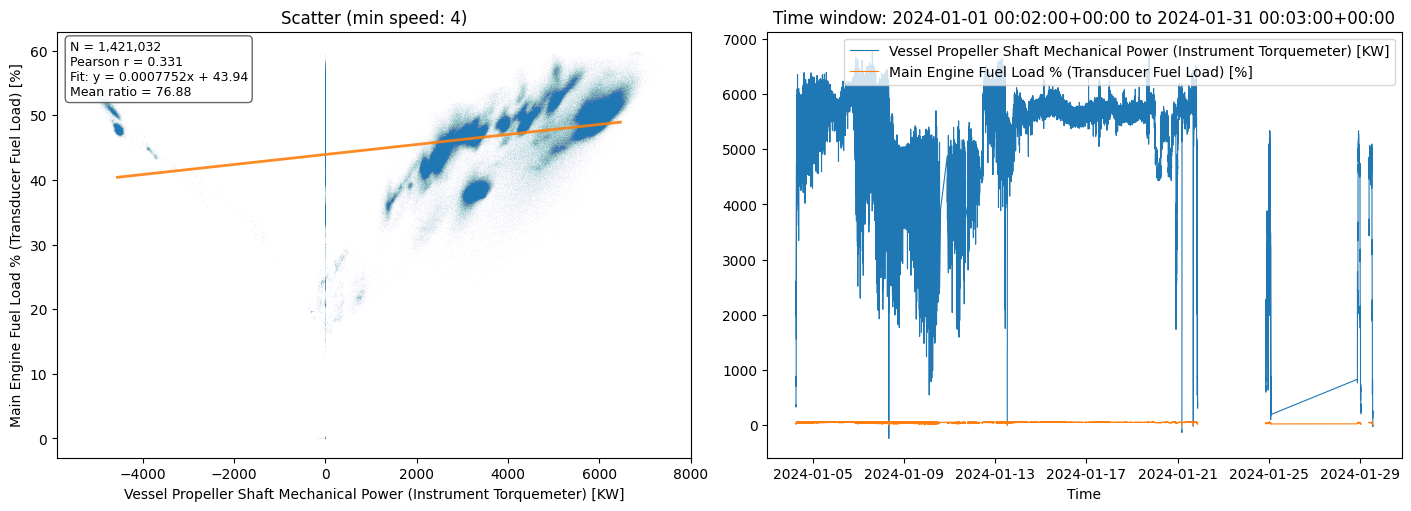

In [24]:
start_time = pd.to_datetime("2024-01-01 00:02:00", utc=True)
end_time = pd.to_datetime("2024-01-31 00:03:00", utc=True)

shaft_power_qid = "2::0::11::0_1::1::0::3::0_14::0::1::0_8"
engine_load_qid = "1::0::25::0_1::2::0::8::0_20::0::1::0_8"

correlation_check(
    full_synced_df,
    column_name_x=shaft_power_qid,
    column_name_y=engine_load_qid,
    line_graph_start=start_time,
    line_graph_end=end_time,
    mean_ratio=True,
    min_speed=4.0,
    speed_column=None,
    metadata=meta_data_df,
    scatter_s=1,
    scatter_alpha=0.02
)

Mean ratio (mean(2::0::11::0_1::1::0::3::0_14::0::1::0_8) / mean(1::0::25::0_1::2::0::8::0_20::0::1::0_8)) = 90.9103


(<Figure size 1400x500 with 2 Axes>,
 (<Axes: title={'center': 'Scatter (min speed: 4)'}, xlabel='Vessel Propeller Shaft Mechanical Power (Instrument Torquemeter) [KW]', ylabel='Main Engine Fuel Load % (Transducer Fuel Load) [%]'>,
  <Axes: title={'center': 'Time window: 2024-01-01 00:02:00+00:00 to 2024-01-31 00:03:00+00:00'}, xlabel='Time'>))

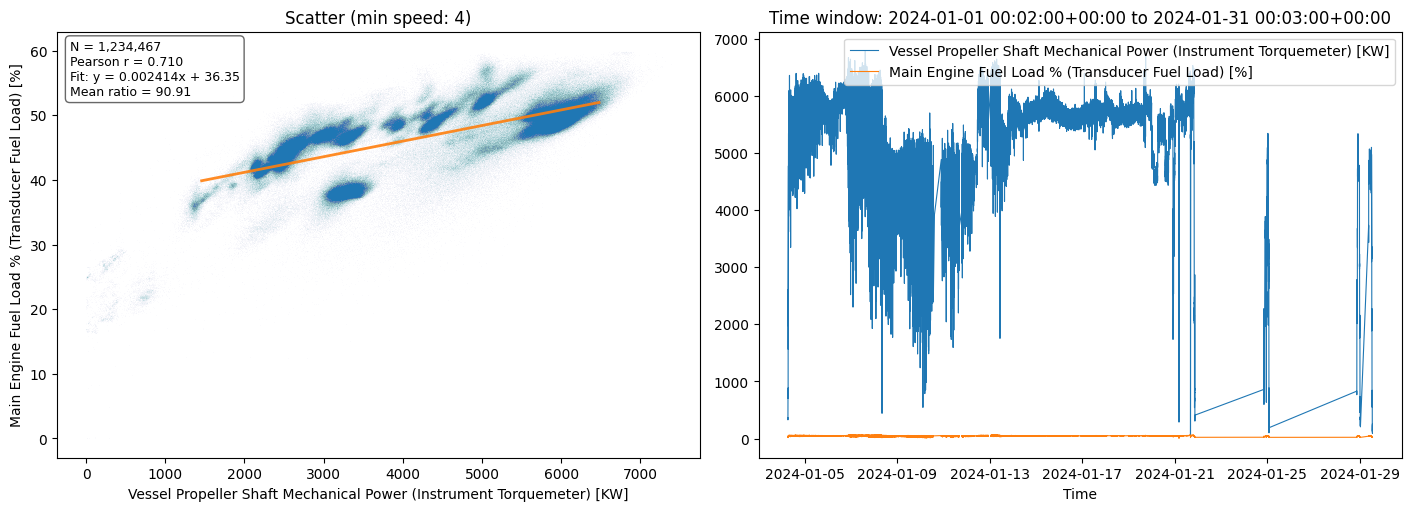

In [25]:
# Filter full_synced_df to exclude rows where shaft_power_qid is 0 or negative
no_negative_power_df = full_synced_df[full_synced_df[shaft_power_qid] > 0]
correlation_check(
    no_negative_power_df,
    column_name_x=shaft_power_qid,
    column_name_y=engine_load_qid,
    line_graph_start=start_time,
    line_graph_end=end_time,
    mean_ratio=True,
    min_speed=4.0,
    speed_column=None,
    metadata=meta_data_df,
    scatter_s=1,
    scatter_alpha=0.02
)

2026-02-11 10:04:41.285 | INFO     | __main__:<module>:4 - number of negative shaft power rows: 29996 (1.49%)


Mean ratio (mean(2::0::11::0_1::1::0::3::0_14::0::1::0_8) / mean(1::0::25::0_1::2::0::8::0_20::0::1::0_8)) = 90.9104


(<Figure size 1400x500 with 2 Axes>,
 (<Axes: title={'center': 'Scatter (min speed: 4)'}, xlabel='Vessel Propeller Shaft Mechanical Power (Instrument Torquemeter) [KW]', ylabel='Main Engine Fuel Load % (Transducer Fuel Load) [%]'>,
  <Axes: title={'center': 'Time window: 2024-01-01 00:02:00+00:00 to 2024-01-31 00:03:00+00:00'}, xlabel='Time'>))

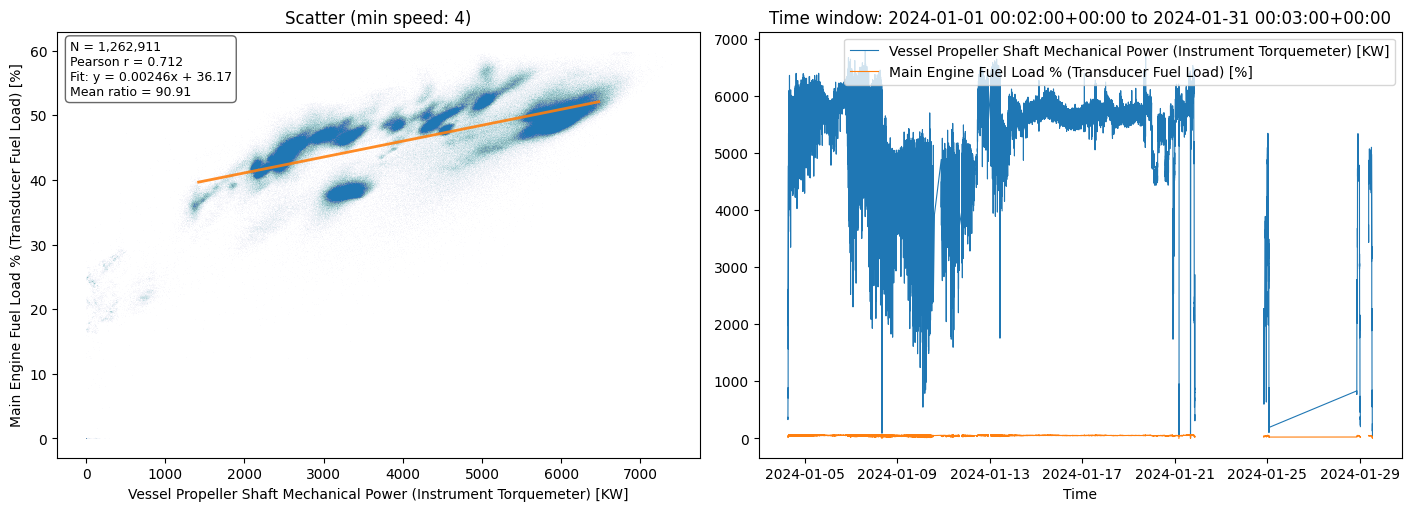

In [27]:
# Make a version of the plot where the the sign is flipped on negative values of shaft power and 0-values of shaft power are removed

flipped_sign_power_df = full_synced_df[full_synced_df[shaft_power_qid] != 0]
logger.info(f'number of negative shaft power rows: {(full_synced_df[shaft_power_qid] < 0).sum()} ({(full_synced_df[shaft_power_qid] < 0).sum() / len(full_synced_df) * 100:.2f}%)')
flipped_sign_power_df[shaft_power_qid] = flipped_sign_power_df[shaft_power_qid].apply(lambda x: -x if x < 0 else x)

correlation_check(
    flipped_sign_power_df,
    column_name_x=shaft_power_qid,
    column_name_y=engine_load_qid,
    line_graph_start=start_time,
    line_graph_end=end_time,
    mean_ratio=True,
    min_speed=4.0,
    speed_column=None,
    metadata=meta_data_df,
    scatter_s=1,
    scatter_alpha=0.02
)


# 6. check physical relationships (scatter & line)

In [ ]:
# include a mean ratio between the calculated value and the mean of synced values for that qid

# TODO: check correlation between shaft power and engine load (should be above 0.95)


# 7. Unphysical relations check

In [ ]:
# TODO: Check wind measurements between providers (Matthew says they have different conventions)

# TODO: Scatterplot between Propeller shaft rotational speed and Main Engine Rotational Speed

# TODO: scatterplot between ship speed and propeller speed (and other variables that should be non-zero when the ship is moving)

# 8. Other

In [ ]:

# TODO: Make a correlation matrix (consider making with and without zero-speed observations)

# TODO: Scatterplot for everything that is measured by both providers